## Load Data

In [158]:
# Load the Excel file data in sheet number 2 using pandas
import pandas as pd
pd.set_option("display.max_columns", None)

# Load the Excel file data in sheet number 2 using pandas, use the first row as the column names
df = pd.read_excel("Case Study for Data Scientist.xlsx", sheet_name="Sheet1", header=0)
df.head()

,Day,Date,Region,Mill Code,Mill Type,Actual OER %,Crop Freshness Score,Ripe %,Long Stalk %,Rat Damage %,Loose Fruits %,Rainfall (mm),Age Profile (years),Total Oil Losses %,Downtime %,FFB Processed (MT),Seed A %,Seed B %,Other Seeds %,Coastal %,Inland %
0,Wed,2020-01-01,R01,Z001,IP,0.00,300.000000,95.157670,1.241942,4.734563,6.833731,0.000000,15.721261,0.000000,0.000000,0.000,31.114312,0.0,68.885688,49.290868,50.709132
1,Thu,2020-01-02,R01,Z001,IP,22.27,289.458286,95.430159,1.859710,3.931418,7.475889,3.342912,13.950932,1.387521,0.254744,648.373,39.927122,0.0,60.072878,46.188086,53.811914
2,Fri,2020-01-03,R01,Z001,IP,22.55,262.890977,94.617481,1.514098,3.568296,7.416632,24.355107,13.322048,1.484348,0.058243,530.021,37.392953,0.0,62.607047,45.361864,54.638136
3,Sat,2020-01-04,R01,Z001,IP,22.12,262.653835,95.404031,1.457055,4.809152,7.225248,1.208765,14.120394,1.364690,0.099324,702.527,33.681927,0.0,66.318073,51.698756,48.301244
4,Sun,2020-01-05,R01,Z001,IP,0.00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000,NaN,NaN,NaN,NaN,NaN


In [159]:
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)
print(len(categorical_features))

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
#numerical_features = numerical_features.drop('Actual OER %')
print(numerical_features)
print(len(numerical_features))

label = 'Actual OER %'


Index(['Day', 'Region', 'Mill Code', 'Mill Type'], dtype='object')
4
Index(['Actual OER %', 'Crop Freshness Score', 'Ripe %', 'Long Stalk %',
       'Rat Damage %', 'Loose Fruits %', 'Rainfall (mm)',
       'Age Profile (years)', 'Total Oil Losses %', 'Downtime %',
       'FFB Processed (MT)', 'Seed A %', 'Seed B %', 'Other Seeds %',
       'Coastal %', 'Inland %'],
      dtype='object')
16


## Feature Engineering

In [160]:
# ZO22 is chosen as the mill code to be analyzed
zo22 = df[df['Mill Code'] == 'Z022']
# set the Date as the index
zo22 = zo22.set_index('Date')
zo22.head(10)


,Day,Region,Mill Code,Mill Type,Actual OER %,Crop Freshness Score,Ripe %,Long Stalk %,Rat Damage %,Loose Fruits %,Rainfall (mm),Age Profile (years),Total Oil Losses %,Downtime %,FFB Processed (MT),Seed A %,Seed B %,Other Seeds %,Coastal %,Inland %
Date,,,,,,,,,,,,,,,,,,,,
2020-01-01,Wed,R04,Z022,IP,20.35,296.777917,77.031644,2.207673,14.028534,5.919710,0.287178,13.029043,1.261184,0.125803,511.405,4.472428,0.0,95.527572,0.0,100.0
2020-01-02,Thu,R04,Z022,IP,20.51,267.854639,85.720531,2.248377,14.948637,8.655752,3.334981,12.278802,1.464456,0.066092,518.319,4.966389,0.0,95.033611,0.0,100.0
2020-01-03,Fri,R04,Z022,IP,21.30,267.452850,85.708630,1.381812,13.041987,6.562387,3.191424,11.611554,1.252361,0.178279,435.348,6.638849,0.0,93.361151,0.0,100.0
2020-01-04,Sat,R04,Z022,IP,20.15,274.061410,85.165413,2.599849,12.903222,6.495598,0.000000,11.714539,1.182214,0.036554,549.164,8.743589,0.0,91.256411,0.0,100.0
2020-01-05,Sun,R04,Z022,IP,0.00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000,NaN,NaN,NaN,NaN,NaN
2020-01-06,Mon,R04,Z022,IP,21.83,300.000000,83.111808,2.594010,10.559147,7.809587,13.234215,12.856042,1.493988,0.146752,537.546,5.553637,0.0,94.446363,0.0,100.0
2020-01-07,Tue,R04,Z022,IP,21.74,269.436603,83.380961,2.157992,12.599063,7.279364,0.552664,13.869995,1.453156,0.097292,595.787,2.693918,0.0,97.306082,0.0,100.0
2020-01-08,Wed,R04,Z022,IP,21.52,273.798453,81.619159,2.041962,13.342093,7.328390,0.450991,14.674018,1.529618,0.127397,628.274,1.721227,0.0,98.278773,0.0,100.0
2020-01-09,Thu,R04,Z022,IP,21.74,272.847626,84.788061,1.772059,12.646855,6.810884,0.054258,14.190942,1.320507,0.107420,589.103,10.251145,0.0,89.748855,0.0,100.0


In [161]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.svm import SVC
from sklego.meta import ZeroInflatedRegressor

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
lgbm = LGBMRegressor()
svm = SVC()
zir = ZeroInflatedRegressor(classifier=SVC(), regressor=LGBMRegressor())

def train_model(model, X_train, y_train, X_test, y_test, X, y):
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Calculate the R^2 score
    r2 = r2_score(y_test, y_pred)
    print("R^2 Score:", r2)

    # Calculate the RMSE
    rmse = mse ** 0.5
    print("Root Mean Squared Error:", rmse)

    # Calculate the MAE
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae)

    # Calculate the MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print("Mean Absolute Percentage Error:", mape)

    # Plot the predicted vs actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual OER %")
    plt.ylabel("Predicted OER %")
    plt.title("Actual OER % vs Predicted OER %")
    plt.plot([0, 100], [0, 100], color='r', linestyle='--')
    plt.show()

    # Calculate the residuals
    residuals = y_test - y_pred

    # Plot the residuals
    # plt.scatter(y_test, residuals)
    # plt.xlabel("Actual OER %")
    # plt.ylabel("Residuals")
    # plt.title("Actual OER % vs Residuals")
    # plt.axhline(y=0, color='r', linestyle='--')
    # plt.show()

    # Plot the residuals vs predicted values
    plt.scatter(y_pred, residuals)
    plt.xlabel("Predicted OER %")
    plt.ylabel("Residuals")
    plt.title("Predicted OER % vs Residuals")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

    # Plot the residuals distribution
    sns.histplot(residuals, kde=True)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Residuals Distribution")
    plt.show()

    inference_df = pd.DataFrame()
    inference_df['Predicted OER %'] = model.predict(X)
    inference_df['Actual OER %'] = y.values
    inference_df['Residuals'] = inference_df['Actual OER %'] - inference_df['Predicted OER %']
    inference_df['Date'] = y.index

    # split the data into 2021, 2022, 2023, and 2024
    inference_df['Year'] = inference_df['Date'].dt.year

    # for 2024
    inference_df_2024 = inference_df[inference_df['Year'] == 2024]
    X_train_2024 = X_train[X_train.index.year == 2024]
    X_test_2024 = X_test[X_test.index.year == 2024]
    # using matplotlib
    plt.plot(inference_df_2024['Date'], inference_df_2024['Actual OER %'], label='Actual OER %')
    plt.plot(inference_df_2024['Date'], inference_df_2024['Predicted OER %'], label='Predicted OER %')
    for i in X_train_2024.index:
        plt.axvline(x=i, color='r', linestyle='-', alpha=0.1)
    plt.xlabel('Date')
    plt.ylabel('OER %')
    plt.title('Training Region')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # using matplotlib
    plt.plot(inference_df_2024['Date'], inference_df_2024['Actual OER %'], label='Actual OER %')
    plt.plot(inference_df_2024['Date'], inference_df_2024['Predicted OER %'], label='Predicted OER %')
    for i in X_test_2024.index:
        plt.axvline(x=i, color='g', linestyle='-', alpha=0.1)
    plt.xlabel('Date')
    plt.ylabel('OER %')
    plt.title('Testing Region')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # using plotly
    import plotly.express as px
    fig = px.line(inference_df, x='Date', y=['Actual OER %', 'Predicted OER %'])
    fig.show()

    return model

In [168]:
# Index(['Crop Freshness Score', 'Ripe %', 'Long Stalk %', 'Rat Damage %',
#       'Loose Fruits %', 'Rainfall (mm)', 'Age Profile (years)',
#       'Total Oil Losses %', 'Downtime %', 'FFB Processed (MT)', 'Seed A %',
#       'Seed B %', 'Other Seeds %', 'Coastal %', 'Inland %'],
#      dtype='object')

zo22_df = zo22.copy()

# drop null values in zo22_df (R^2 Score: 0.63, rmse: 3.40)
zo22_df = zo22_df.dropna()

# remove outliers using IQR method
#for feature in numerical_features:
#     Q1 = zo22_df[feature].quantile(0.15)
#     Q3 = zo22_df[feature].quantile(0.85)
#     IQR = Q3 - Q1
#     zo22_df = zo22_df[(zo22_df[feature] >= (Q1 - 1.5 * IQR)) & (zo22_df[feature] <= (Q3 + 1.5 * IQR))]

# standardize the numerical features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# zo22_df[numerical_features] = scaler.fit_transform(zo22_df[numerical_features])


# remove rows where Actual OER % is 0
# zo22_df = zo22_df[zo22_df['Actual OER %'] != 0]
# zo22_df = zo22_df[zo22_df['FFB Processed (MT)'] != 0]


# using necessary features (R^2 Score: 0.63, rmse: 3.40)
# refined_features = numerical_features.drop([label, 'Other Seeds %', 'Seed B %', 'Inland %', 'Total Oil Losses %'])
refined_features = [
   "FFB Processed (MT)",
   "Crop Freshness Score",
   "Ripe %",
   "Loose Fruits %",
]
#refined_features = numerical_features.drop([label])
# filter the features
X = zo22_df[refined_features]
print(X.columns)

# using numerical features R^2 Score: 0.73, rmse: 2.93
# X = zo22_df[numerical_features].drop(label, axis=1)

y = zo22_df[label]

## Split the data into training and testing sets
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using scikit-learn TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=25)
for train_index, test_index in tscv.split(X):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# Check multicollinearity  using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant for intercept
features_check = add_constant(zo22_df[numerical_features])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features_check.columns
vif_data["VIF"] = [variance_inflation_factor(features_check.values, i) for i in range(features_check.shape[1])]

print(vif_data)

Index(['FFB Processed (MT)', 'Crop Freshness Score', 'Ripe %',
       'Loose Fruits %'],
      dtype='object')
                 Feature       VIF
0           Actual OER %  3.158458
1   Crop Freshness Score  1.230234
2                 Ripe %  1.207484
3           Long Stalk %  1.290943
4           Rat Damage %  1.072650
5         Loose Fruits %  1.162910
6          Rainfall (mm)  1.037387
7    Age Profile (years)  1.086377
8     Total Oil Losses %  1.506128
9             Downtime %  1.325598
10    FFB Processed (MT)  2.280633
11              Seed A %       inf
12              Seed B %       NaN
13         Other Seeds %       inf
14             Coastal %       NaN
15              Inland %  0.000000


/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning:

invalid value encountered in scalar divide

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide



In [ ]:
## Create example time-series DataFrame
#date_range = pd.date_range(start="2020-01-01", periods=100, freq="D")
#df = zo22_df.copy()
#df.reset_index(inplace=True)
#
#for i in range(5):
#    # Parameters
#    train_size = 60  # Training window size
#    val_size = 20  # Validation window size
#    test_size = 20  # Test window size (optional)
#
#    # Sequential window splitting
#    splits = []
#    for start in range(0, len(df) - train_size - val_size - test_size + 1, test_size):
#        train = df.iloc[start : start + train_size]
#        val = df.iloc[start + train_size : start + train_size + val_size]
#        test = df.iloc[
#            start + train_size + val_size : start + train_size + val_size + test_size
#        ]
#        splits.append((train, val, test))
#
#    # Example output: First split
#    train, val, test = splits[0]
#    print("Train Start:", train["Date"].iloc[0], "Train End:", train["Date"].iloc[-1])
#    print("Validation Start:", val["Date"].iloc[0], "Validation End:", val["Date"].iloc[-1])
#    print("Test Start:", test["Date"].iloc[0], "Test End:", test["Date"].iloc[-1])
#
#    # Example: Train/Validation/Test lengths
#    print("Train size:", len(train))
#    print("Validation size:", len(val))
#    print("Test size:", len(test))

Train Start: 2020-01-01 00:00:00 Train End: 2020-03-10 00:00:00
Validation Start: 2020-03-11 00:00:00 Validation End: 2020-04-02 00:00:00
Test Start: 2020-04-03 00:00:00 Test End: 2020-04-27 00:00:00
Train size: 60
Validation size: 20
Test size: 20
Train Start: 2020-01-01 00:00:00 Train End: 2020-03-10 00:00:00
Validation Start: 2020-03-11 00:00:00 Validation End: 2020-04-02 00:00:00
Test Start: 2020-04-03 00:00:00 Test End: 2020-04-27 00:00:00
Train size: 60
Validation size: 20
Test size: 20
Train Start: 2020-01-01 00:00:00 Train End: 2020-03-10 00:00:00
Validation Start: 2020-03-11 00:00:00 Validation End: 2020-04-02 00:00:00
Test Start: 2020-04-03 00:00:00 Test End: 2020-04-27 00:00:00
Train size: 60
Validation size: 20
Test size: 20
Train Start: 2020-01-01 00:00:00 Train End: 2020-03-10 00:00:00
Validation Start: 2020-03-11 00:00:00 Validation End: 2020-04-02 00:00:00
Test Start: 2020-04-03 00:00:00 Test End: 2020-04-27 00:00:00
Train size: 60
Validation size: 20
Test size: 20
Trai

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1487, number of used features: 4
[LightGBM] [Info] Start training from score 19.005595
Mean Squared Error: 0.6320560188976182
R^2 Score: 0.9697720253493742
Root Mean Squared Error: 0.7950195085012809
Mean Absolute Error: 0.6356971794431385
Mean Absolute Percentage Error: inf


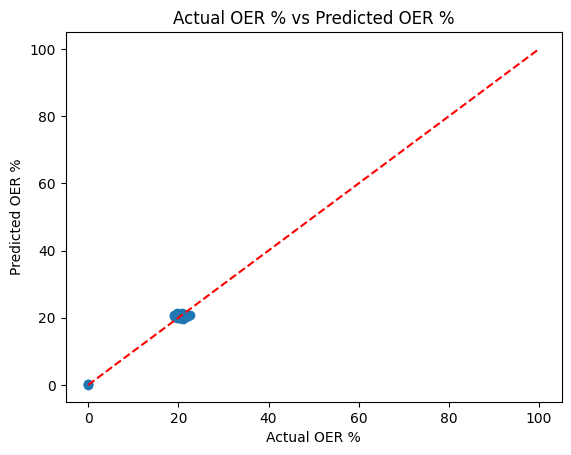

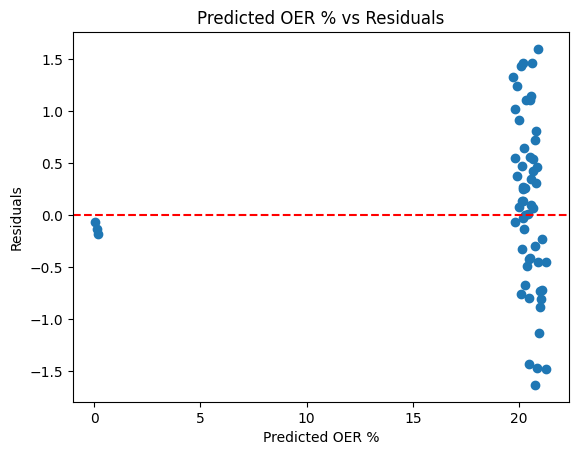

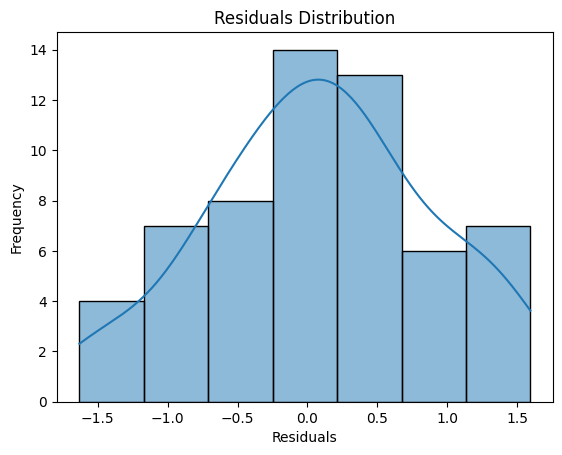

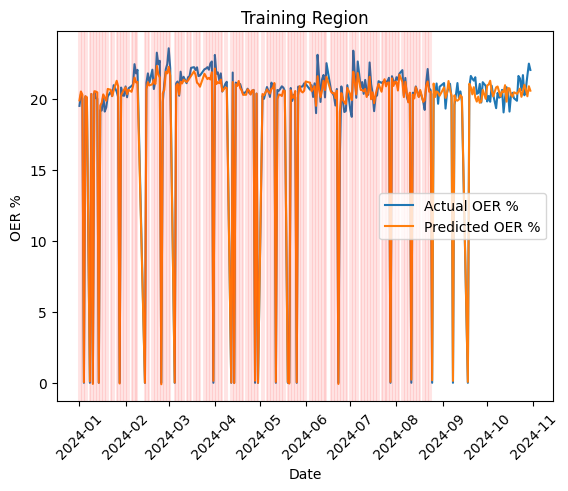

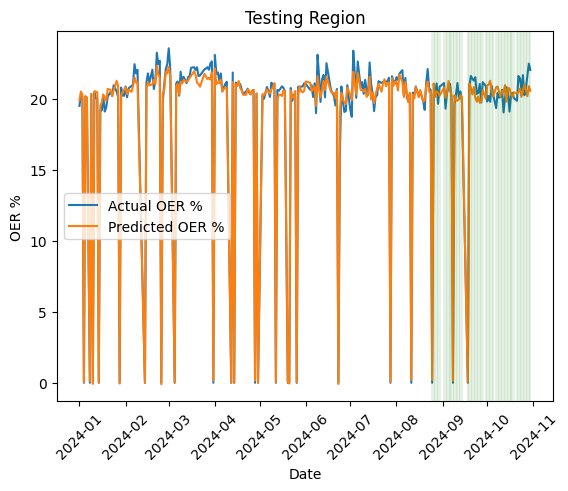

In [169]:
lgbm_trained =train_model(lgbm, X_train, y_train, X_test, y_test, X, y)

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning:

The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning:

The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1184, number of used features: 4
[LightGBM] [Info] Start training from score 20.687897
Mean Squared Error: 2.9584902217220908
R^2 Score: 0.9114470568498565
Root Mean Squared Error: 1.7200262270448352
Mean Absolute Error: 0.8219465916771641
Mean Absolute Percentage Error: 4.2316431421083385


/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



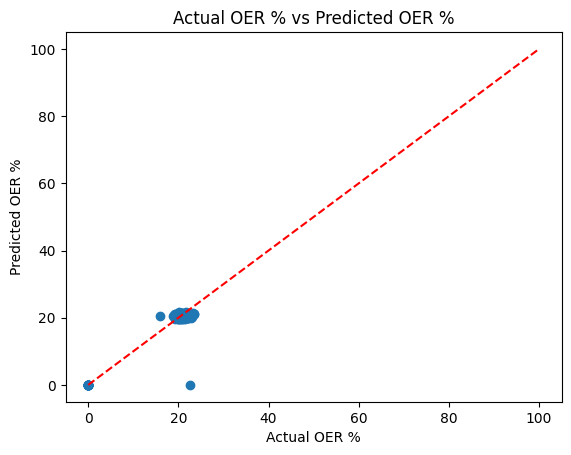

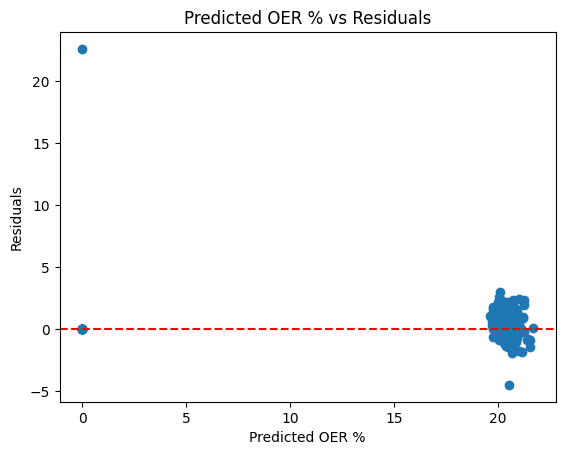

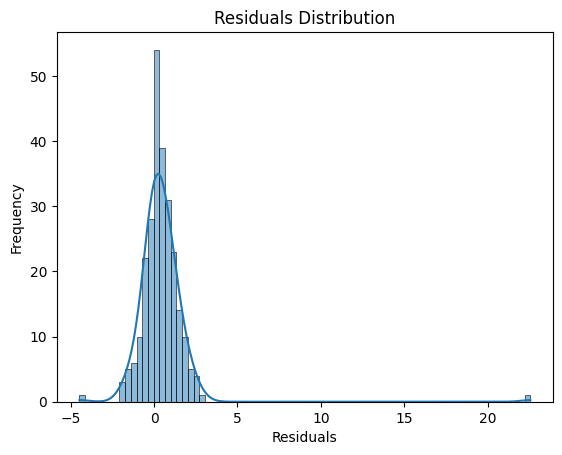

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



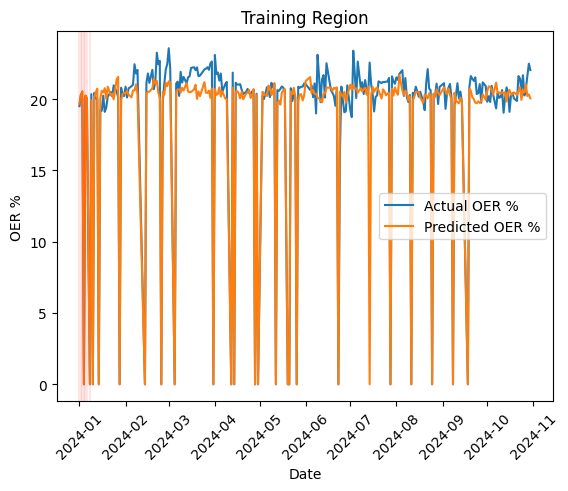

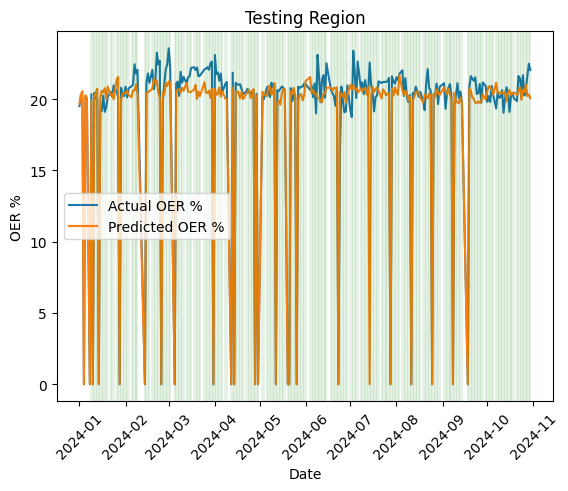

In [164]:
zir_trained = train_model(zir, X_train, y_train, X_test, y_test, X, y)